In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors as mpc
from scipy.stats import linregress
import seaborn as sns
from sqlalchemy import create_engine

from bs4 import BeautifulSoup
from splinter import Browser

from webdriver_manager.chrome import ChromeDriverManager

# Store CSVs into DataFrames

# Section I: We looked at phone data sets for all 6 continents then we extracted, transformed and loaded the data into MongoDB to later compare which phone brand is most commonly used in each region.

# Africa

In [2]:
# read csv file Africa
africa_csv = "static/Data/africa.csv"

In [3]:
# Create dataframe
africa_df = pd.read_csv(africa_csv)
africa_df

,Date,Samsung,Apple,Huawei,Tecno,Infinix,Xiaomi,Oppo,Unknown,Itel,...,CAT,White Label,Caterpillar,MobiWire,RIM,Honor,Meizu,bq,Coolpad,Other
0,2021-05,30.11,16.23,15.90,8.06,5.23,4.35,5.15,4.96,1.95,...,0.04,0.02,0.03,0.03,0.03,0.01,0.02,0.01,0.01,0.15
1,2021-06,30.92,14.47,16.86,6.73,4.96,4.88,6.49,4.74,1.65,...,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.14
2,2021-07,31.85,15.95,16.21,7.79,4.84,3.88,4.19,5.50,1.85,...,0.04,0.02,0.03,0.03,0.02,0.01,0.01,0.01,0.01,0.15
3,2021-08,32.06,15.68,15.22,8.11,6.18,4.25,4.14,4.47,1.92,...,0.03,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.14
4,2021-09,31.54,14.90,14.68,8.26,6.60,4.69,4.79,4.52,1.96,...,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.13
5,2021-10,31.67,14.57,14.04,8.60,6.83,4.98,4.57,4.67,2.03,...,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.14
6,2021-11,31.88,14.53,13.96,8.38,6.81,5.22,4.61,4.65,2.02,...,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.14
7,2021-12,32.50,15.48,14.19,7.61,6.04,5.28,4.58,4.67,1.90,...,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.13
8,2022-01,32.09,15.53,13.67,8.29,6.27,5.84,4.97,3.44,1.97,...,0.02,0.03,0.01,0.02,0.02,0.02,0.02,0.01,0.01,0.13
9,2022-02,30.85,14.21,13.69,8.15,6.68,6.52,6.51,2.96,1.93,...,0.02,0.03,0.01,0.01,0.02,0.02,0.02,0.01,0.01,0.13


In [4]:
#Code to view all columns in dataset
pd.set_option('max_columns', None)
africa_df

,Date,Samsung,Apple,Huawei,Tecno,Infinix,Xiaomi,Oppo,Unknown,Itel,Nokia,Realme,Lenovo,Vivo,LG,Infinex,Sony,Condor,HTC,Hisense,Motorola,Vodafone,Gionee,Google,Safaricom,OnePlus,ZTE,Mobicel,Wiko,Alcatel,BBK,Lava,Asus,Sharp,CAT,White Label,Caterpillar,MobiWire,RIM,Honor,Meizu,bq,Coolpad,Other
0,2021-05,30.11,16.23,15.90,8.06,5.23,4.35,5.15,4.96,1.95,1.61,1.27,0.62,0.38,0.57,0.47,0.38,0.25,0.26,0.24,0.21,0.24,0.20,0.13,0.19,0.12,0.11,0.10,0.11,0.10,0.05,0.05,0.04,0.02,0.04,0.02,0.03,0.03,0.03,0.01,0.02,0.01,0.01,0.15
1,2021-06,30.92,14.47,16.86,6.73,4.96,4.88,6.49,4.74,1.65,1.52,1.92,0.57,0.45,0.53,0.47,0.36,0.22,0.31,0.24,0.19,0.20,0.16,0.07,0.14,0.11,0.10,0.10,0.10,0.10,0.04,0.06,0.03,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.14
2,2021-07,31.85,15.95,16.21,7.79,4.84,3.88,4.19,5.50,1.85,1.68,1.01,0.64,0.42,0.61,0.45,0.37,0.26,0.26,0.28,0.21,0.22,0.19,0.14,0.15,0.13,0.11,0.12,0.10,0.09,0.05,0.04,0.04,0.02,0.04,0.02,0.03,0.03,0.02,0.01,0.01,0.01,0.01,0.15
3,2021-08,32.06,15.68,15.22,8.11,6.18,4.25,4.14,4.47,1.92,1.64,0.90,0.85,0.51,0.59,0.47,0.33,0.26,0.26,0.23,0.19,0.21,0.19,0.22,0.14,0.12,0.11,0.11,0.10,0.10,0.05,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.14
4,2021-09,31.54,14.90,14.68,8.26,6.60,4.69,4.79,4.52,1.96,1.62,1.06,0.84,0.56,0.57,0.51,0.32,0.23,0.24,0.22,0.18,0.20,0.20,0.20,0.16,0.12,0.11,0.10,0.09,0.09,0.05,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.13
5,2021-10,31.67,14.57,14.04,8.60,6.83,4.98,4.57,4.67,2.03,1.59,0.94,0.71,0.58,0.63,0.55,0.31,0.39,0.23,0.21,0.20,0.19,0.19,0.19,0.16,0.13,0.11,0.10,0.10,0.08,0.05,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.14
6,2021-11,31.88,14.53,13.96,8.38,6.81,5.22,4.61,4.65,2.02,1.60,0.99,0.68,0.63,0.58,0.52,0.32,0.33,0.23,0.23,0.19,0.16,0.18,0.18,0.15,0.14,0.11,0.10,0.09,0.08,0.06,0.04,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.14
7,2021-12,32.50,15.48,14.19,7.61,6.04,5.28,4.58,4.67,1.90,1.59,1.06,0.61,0.65,0.59,0.44,0.31,0.21,0.21,0.22,0.22,0.16,0.18,0.18,0.16,0.15,0.10,0.10,0.08,0.08,0.06,0.03,0.04,0.03,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.13
8,2022-01,32.09,15.53,13.67,8.29,6.27,5.84,4.97,3.44,1.97,1.52,1.18,0.78,0.71,0.54,0.42,0.29,0.28,0.26,0.21,0.19,0.14,0.16,0.22,0.14,0.14,0.09,0.08,0.08,0.08,0.05,0.03,0.03,0.03,0.02,0.03,0.01,0.02,0.02,0.02,0.02,0.01,0.01,0.13
9,2022-02,30.85,14.21,13.69,8.15,6.68,6.52,6.51,2.96,1.93,1.43,1.95,0.86,0.82,0.44,0.47,0.25,0.23,0.19,0.18,0.19,0.13,0.14,0.24,0.11,0.12,0.08,0.07,0.07,0.07,0.05,0.04,0.03,0.03,0.02,0.03,0.01,0.01,0.02,0.02,0.02,0.01,0.01,0.13


In [5]:
# Preforming a .count to make sure that the data is complete
print(africa_df.count())

Date           13
Samsung        13
Apple          13
Huawei         13
Tecno          13
Infinix        13
Xiaomi         13
Oppo           13
Unknown        13
Itel           13
Nokia          13
Realme         13
Lenovo         13
Vivo           13
LG             13
Infinex        13
Sony           13
Condor         13
HTC            13
Hisense        13
Motorola       13
Vodafone       13
Gionee         13
Google         13
Safaricom      13
OnePlus        13
ZTE            13
Mobicel        13
Wiko           13
Alcatel        13
BBK            13
Lava           13
Asus           13
Sharp          13
CAT            13
White Label    13
Caterpillar    13
MobiWire       13
RIM            13
Honor          13
Meizu          13
bq             13
Coolpad        13
Other          13
dtype: int64


In [6]:
#Let's also calculate the average of pollutants released from 2011 to 2020 across each column
africa_average = africa_df[["Samsung", "Apple", "Huawei", "Tecno", "Infinix", "Xiaomi", "Oppo", "Unknown", "Itel", "Nokia"]].mean()
africa_average

Samsung    31.782308
Apple      14.941538
Huawei     14.383846
Tecno       8.288462
Infinix     6.134615
Xiaomi      5.194615
Oppo        4.976154
Unknown     4.347692
Itel        1.979231
Nokia       1.609231
dtype: float64

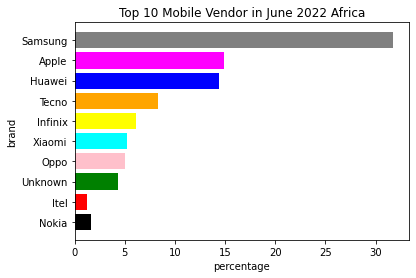

In [7]:
#Create a bar plot to see the top ten mobile device vendor in June 2022 Africa
brand = ['Nokia', 'Itel', 'Unknown', 'Oppo', 'Xiaomi', 'Infinix', 'Tecno', 'Huawei', 'Apple', 'Samsung']
# percentage = [31.78, 14.94, 14.38, 8.29, 6.13, 5.19, 4.98, 4.35, 1.2, 1.6]
percentage = [1.6, 1.2, 4.35, 4.98, 5.19, 6.13, 8.29, 14.38, 14.94, 31.78]

plt.barh(brand,percentage, color=['black', 'red', 'green', 'pink', 'cyan', 'yellow', 'orange', 'blue', 'magenta', 'grey'])
# plt.barh(x_pos, lifespan, color=['black', 'red', 'green', 'pink', 'cyan', 'yellow', 'orange', 'blue', 'magenta', 'grey'])
plt.title('Top 10 Mobile Vendor in June 2022 Africa')
plt.ylabel('brand')
plt.xlabel('percentage')
plt.show()

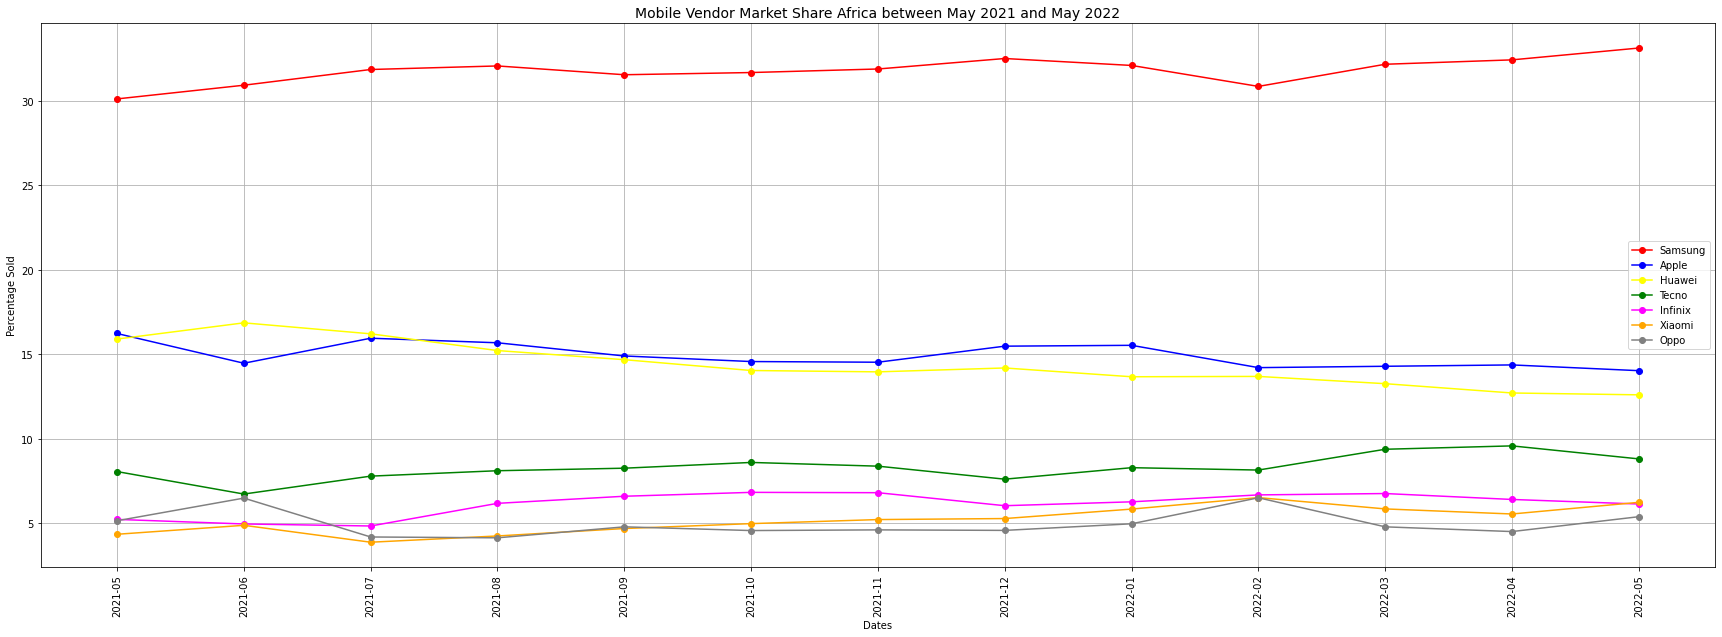

In [8]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(africa_df['Date'], africa_df['Samsung'], color='red', marker='o', label="Samsung")
plt.plot(africa_df['Date'], africa_df['Apple'], color='blue', marker='o', label="Apple")
plt.plot(africa_df['Date'], africa_df['Huawei'], color='yellow', marker='o', label="Huawei")
plt.plot(africa_df['Date'], africa_df['Tecno'], color='green', marker='o', label="Tecno")
plt.plot(africa_df['Date'], africa_df['Infinix'], color='magenta', marker='o', label="Infinix")
plt.plot(africa_df['Date'], africa_df['Xiaomi'], color='orange', marker='o', label="Xiaomi")
plt.plot(africa_df['Date'], africa_df['Oppo'], color='grey', marker='o', label="Oppo")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share Africa between May 2021 and May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
mpc.cursor(hover=True)
plt.savefig("static/Img/Mobile Vendor Market Share Africa between May 2021 and May 2022.png")
plt.show()

# Asia

In [9]:
# read csv file Asia
asia_csv = "static/Data/asia.csv"

In [10]:
# Create dataframe
asia_df = pd.read_csv(asia_csv)
asia_df.head()

,Date,Samsung,Apple,Xiaomi,Oppo,Vivo,Huawei,Realme,Unknown,OnePlus,Infinix,Tecno,Asus,Motorola,Nokia,Lenovo,Sony,LG,BBK,Itel,Google,General Mobile,HTC,Lava,Infinex,Vestel,Casper,Micromax,Gionee,Honor,LeEco,Sharp,Meizu,QMobile,Reeder,Alcatel,ZTE,Turkcell,Panasonic,Wiko,Mobiistar,Lyf,Coolpad,Yxtel,Other
0,2021-05,25.40,16.14,15.17,9.26,7.78,8.39,4.34,4.36,1.12,0.59,0.59,0.85,0.65,0.68,0.72,0.60,0.59,0.36,0.19,0.23,0.27,0.29,0.20,0.13,0.12,0.11,0.14,0.08,0.04,0.02,0.04,0.05,0.06,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.21
1,2021-06,24.55,16.34,15.46,9.55,8.10,8.06,4.63,4.22,1.16,0.62,0.62,0.84,0.68,0.68,0.70,0.56,0.54,0.36,0.20,0.21,0.24,0.29,0.20,0.15,0.11,0.10,0.14,0.07,0.04,0.03,0.04,0.04,0.06,0.03,0.03,0.03,0.02,0.03,0.02,0.02,0.02,0.02,0.01,0.19
2,2021-07,24.32,16.49,15.74,9.55,8.10,7.78,4.81,4.33,1.12,0.67,0.66,0.81,0.68,0.67,0.67,0.53,0.52,0.34,0.21,0.20,0.23,0.27,0.19,0.16,0.10,0.09,0.13,0.07,0.04,0.02,0.04,0.04,0.06,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.17
3,2021-08,24.34,16.05,16.43,9.76,8.74,7.50,5.19,3.01,1.20,0.89,0.76,0.77,0.63,0.63,0.62,0.52,0.51,0.30,0.30,0.23,0.20,0.25,0.16,0.15,0.09,0.09,0.10,0.07,0.03,0.02,0.04,0.04,0.05,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.15
4,2021-09,23.99,15.90,16.63,9.89,8.88,7.65,5.28,3.00,1.20,0.90,0.75,0.73,0.61,0.60,0.60,0.50,0.48,0.29,0.29,0.25,0.20,0.23,0.16,0.15,0.09,0.09,0.10,0.06,0.04,0.02,0.04,0.04,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.15


In [11]:
# Preforming a .count to make sure that the data is complete
print(asia_df.count())

Date              13
Samsung           13
Apple             13
Xiaomi            13
Oppo              13
Vivo              13
Huawei            13
Realme            13
Unknown           13
OnePlus           13
Infinix           13
Tecno             13
Asus              13
Motorola          13
Nokia             13
Lenovo            13
Sony              13
LG                13
BBK               13
Itel              13
Google            13
General Mobile    13
HTC               13
Lava              13
Infinex           13
Vestel            13
Casper            13
Micromax          13
Gionee            13
Honor             13
LeEco             13
Sharp             13
Meizu             13
QMobile           13
Reeder            13
Alcatel           13
ZTE               13
Turkcell          13
Panasonic         13
Wiko              13
Mobiistar         13
Lyf               13
Coolpad           13
Yxtel             13
Other             13
dtype: int64


In [12]:
# Average of Cell phones sold June 2022
asia_average = asia_df[["Samsung", "Apple", "Xiaomi", "Oppo", "Vivo", "Huawei", "Realme", "Unknown", "OnePlus", "Infinix"]].mean()
asia_average

Samsung    24.081538
Apple      16.891538
Xiaomi     16.462308
Oppo        9.521538
Vivo        8.388462
Huawei      7.294615
Realme      5.280769
Unknown     3.555385
OnePlus     1.256154
Infinix     0.861538
dtype: float64

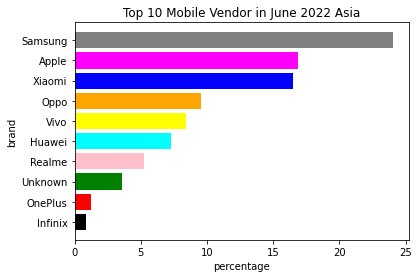

In [13]:
#Create a bar plot to see the top ten mobile device vendor in June 2022 Asia
brand = ['Infinix', 'OnePlus', 'Unknown', 'Realme', 'Huawei', 'Vivo', 'Oppo', 'Xiaomi', 'Apple', 'Samsung']
# percentage = [31.78, 14.94, 14.38, 8.29, 6.13, 5.19, 4.98, 4.35, 1.2, 1.6]
percentage = [0.86, 1.25, 3.55, 5.28, 7.29, 8.38, 9.52, 16.46, 16.89, 24.08]

plt.barh(brand,percentage, color=['black', 'red', 'green', 'pink', 'cyan', 'yellow', 'orange', 'blue', 'magenta', 'grey'])
# plt.barh(x_pos, lifespan, color=['black', 'red', 'green', 'pink', 'cyan', 'yellow', 'orange', 'blue', 'magenta', 'grey'])
plt.title('Top 10 Mobile Vendor in June 2022 Asia')
plt.ylabel('brand')
plt.xlabel('percentage')
plt.savefig("static/img/Top 10 Mobile Vendor in June 2022 Asia.png")
plt.show()

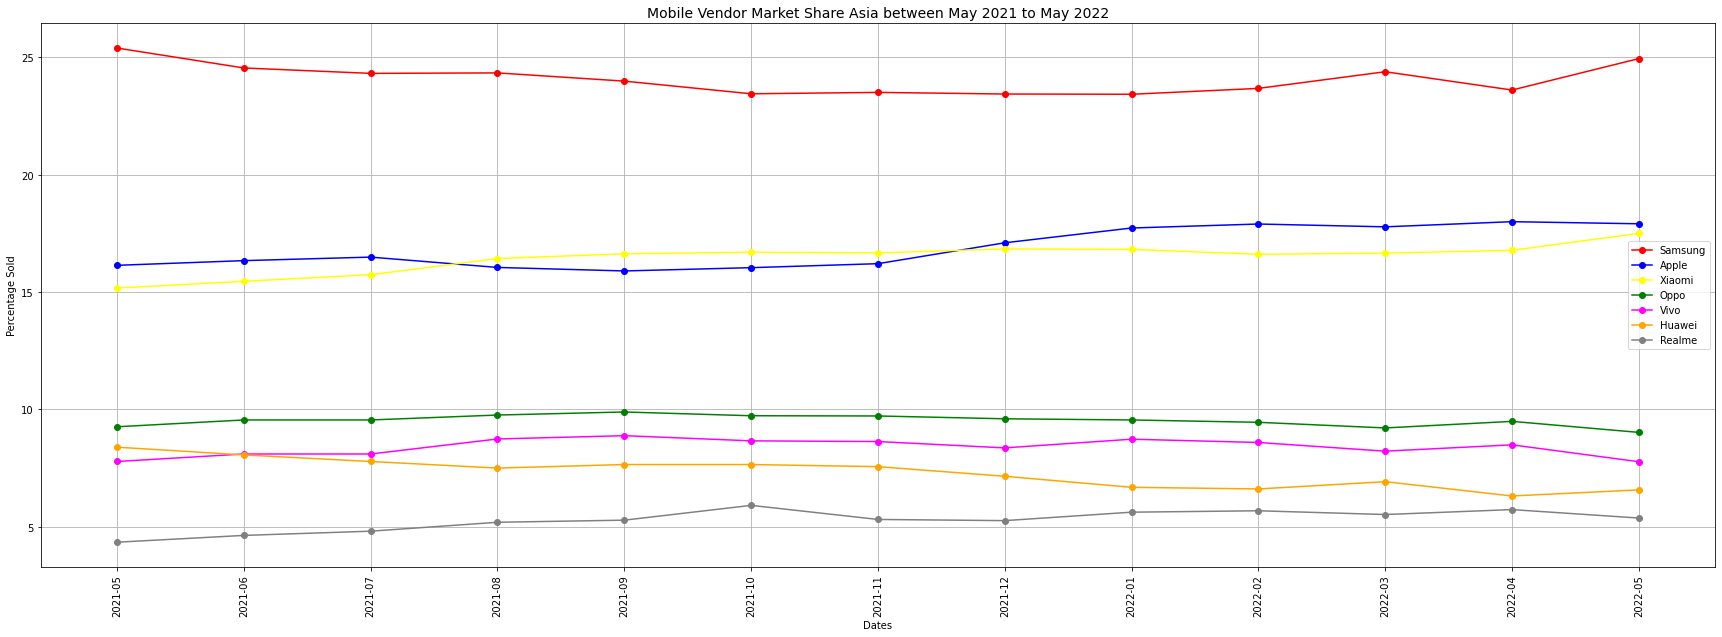

In [14]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(asia_df['Date'], asia_df['Samsung'], color='red', marker='o', label="Samsung")
plt.plot(asia_df['Date'], asia_df['Apple'], color='blue', marker='o', label="Apple")
plt.plot(asia_df['Date'], asia_df['Xiaomi'], color='yellow', marker='o', label="Xiaomi")
plt.plot(asia_df['Date'], asia_df['Oppo'], color='green', marker='o', label="Oppo")
plt.plot(asia_df['Date'], asia_df['Vivo'], color='magenta', marker='o', label="Vivo")
plt.plot(asia_df['Date'], asia_df['Huawei'], color='orange', marker='o', label="Huawei")
plt.plot(asia_df['Date'], asia_df['Realme'], color='grey', marker='o', label="Realme")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share Asia between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share Asia between May 2021 to May 2022.png")
plt.show()

# Europe

In [15]:
# read csv file Europe
europe_csv = "static/Data/europe.csv"

In [16]:
# Create dataframe
europe_df = pd.read_csv(europe_csv)
europe_df.head()

,Date,Apple,Samsung,Xiaomi,Huawei,Oppo,Motorola,Unknown,OnePlus,LG,Sony,Realme,Lenovo,Nokia,Google,Vivo,Alcatel,Asus,ZTE,HTC,Tecno,Honor,bq,Wiko,Infinix,Vodafone,Meizu,CAT,TCL,Caterpillar,Itel,MyPhone,General Mobile,Neffos,Archos,RIM,Other
0,2021-05,30.83,32.35,10.55,14.58,1.26,1.61,1.38,0.93,1.21,0.94,0.36,0.80,0.76,0.54,0.22,0.24,0.25,0.16,0.17,0.07,0.07,0.11,0.11,0.05,0.06,0.06,0.03,0.0,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.19
1,2021-06,30.10,32.57,10.68,14.68,1.30,1.65,1.64,0.91,1.16,0.92,0.37,0.75,0.80,0.54,0.23,0.24,0.24,0.17,0.16,0.08,0.09,0.08,0.10,0.05,0.06,0.06,0.05,0.0,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.19
2,2021-07,30.82,32.37,10.76,14.01,1.36,1.67,1.72,0.94,1.11,0.91,0.38,0.78,0.77,0.59,0.23,0.21,0.23,0.15,0.15,0.08,0.07,0.07,0.09,0.05,0.06,0.06,0.04,0.0,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.18
3,2021-08,30.02,33.30,11.58,13.19,1.60,1.68,1.27,0.98,1.16,0.87,0.53,0.74,0.72,0.58,0.25,0.20,0.21,0.15,0.13,0.09,0.08,0.07,0.08,0.07,0.05,0.05,0.03,0.0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.17
4,2021-09,32.16,32.12,11.78,12.38,1.63,1.62,1.20,1.00,1.04,0.79,0.59,0.73,0.68,0.57,0.27,0.18,0.20,0.15,0.12,0.10,0.09,0.07,0.07,0.07,0.05,0.05,0.03,0.0,0.02,0.02,0.02,0.01,0.02,0.02,0.02,0.15


In [17]:
# Preforming a .count to make sure that the data is complete
print(europe_df.count())

Date              13
Apple             13
Samsung           13
Xiaomi            13
Huawei            13
Oppo              13
Motorola          13
Unknown           13
OnePlus           13
LG                13
Sony              13
Realme            13
Lenovo            13
Nokia             13
Google            13
Vivo              13
Alcatel           13
Asus              13
ZTE               13
HTC               13
Tecno             13
Honor             13
bq                13
Wiko              13
Infinix           13
Vodafone          13
Meizu             13
CAT               13
TCL               13
Caterpillar       13
Itel              13
MyPhone           13
General Mobile    13
Neffos            13
Archos            13
RIM               13
Other             13
dtype: int64


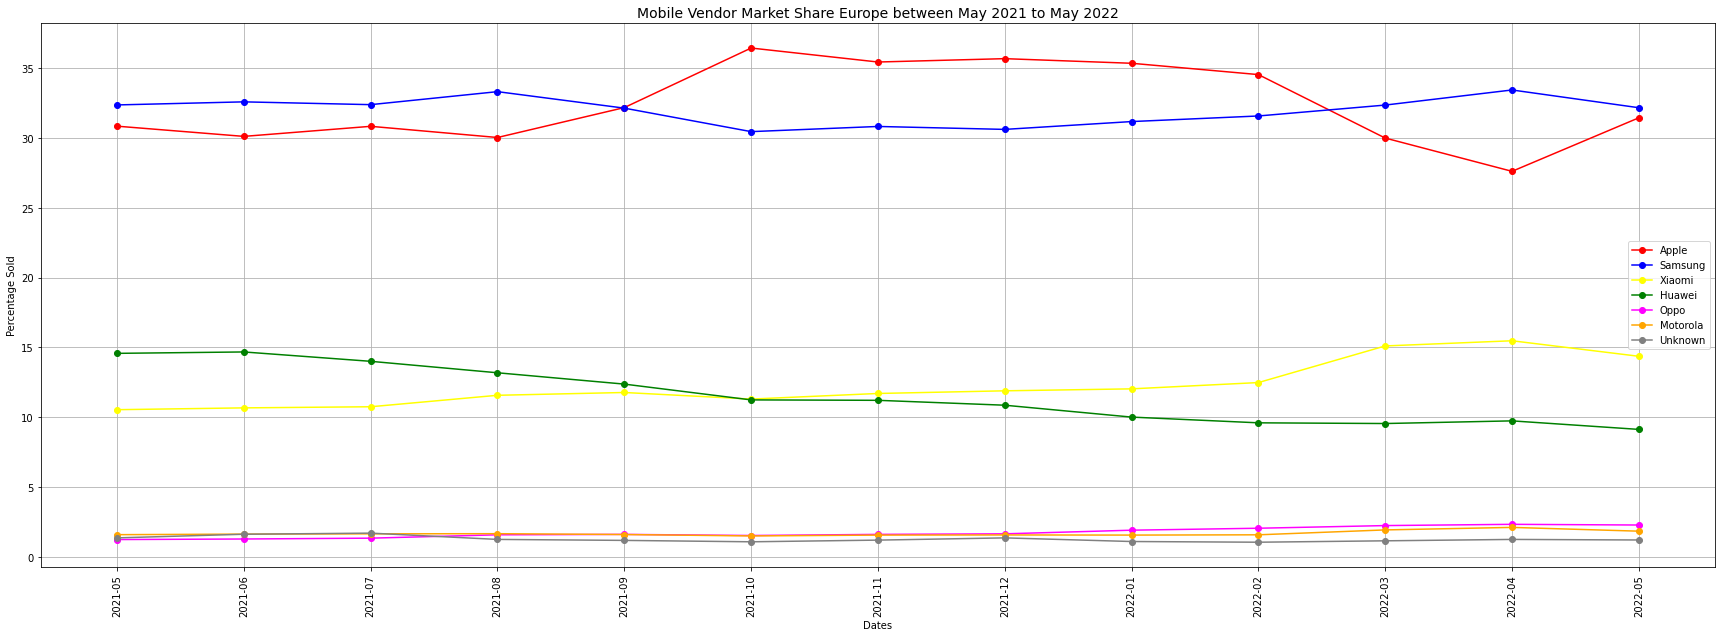

In [18]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(europe_df['Date'], europe_df['Apple'], color='red', marker='o', label="Apple")
plt.plot(europe_df['Date'], europe_df['Samsung'], color='blue', marker='o', label="Samsung")
plt.plot(europe_df['Date'], europe_df['Xiaomi'], color='yellow', marker='o', label="Xiaomi")
plt.plot(europe_df['Date'], europe_df['Huawei'], color='green', marker='o', label="Huawei")
plt.plot(europe_df['Date'], europe_df['Oppo'], color='magenta', marker='o', label="Oppo")
plt.plot(europe_df['Date'], europe_df['Motorola'], color='orange', marker='o', label="Motorola")
plt.plot(europe_df['Date'], europe_df['Unknown'], color='grey', marker='o', label="Unknown")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share Europe between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share Europe between May 2021 to May 2022.png")
plt.show()

# North America

In [19]:
# read csv file North America
northamerica_csv = "static/Data/north america.csv"

In [20]:
# Create dataframe
northamerica_df = pd.read_csv(northamerica_csv)
northamerica_df.head()

,Date,Apple,Samsung,Motorola,LG,Huawei,Google,Xiaomi,Unknown,OnePlus,Oppo,ZTE,Vivo,Alcatel,Nokia,T-Mobile,Realme,Lenovo,Sony,Kyocera,Unimax,Coolpad,Sumsung,Infinix,Tecno,Asus,HTC,AT&T,TCL,Lanix,RIM,BlackBerry,Honor,Itel,Other
0,2021-05,53.93,25.79,4.33,4.24,2.96,2.15,1.50,1.86,0.57,0.32,0.35,0.23,0.24,0.18,0.15,0.16,0.16,0.10,0.08,0.05,0.09,0.07,0.05,0.05,0.06,0.05,0.03,0.0,0.02,0.02,0.02,0.02,0.01,0.17
1,2021-06,53.62,26.16,4.49,4.31,2.89,2.11,1.55,1.54,0.57,0.35,0.35,0.25,0.24,0.19,0.16,0.17,0.15,0.11,0.08,0.06,0.09,0.07,0.05,0.06,0.06,0.05,0.03,0.0,0.02,0.02,0.01,0.01,0.01,0.17
2,2021-07,53.60,26.28,4.52,4.27,2.75,2.10,1.52,1.61,0.60,0.35,0.33,0.25,0.23,0.19,0.17,0.16,0.16,0.10,0.08,0.08,0.09,0.07,0.06,0.06,0.05,0.04,0.03,0.0,0.02,0.02,0.01,0.01,0.01,0.17
3,2021-08,52.80,27.65,4.50,3.99,2.74,2.05,1.61,1.07,0.79,0.36,0.33,0.26,0.21,0.17,0.17,0.16,0.16,0.09,0.07,0.20,0.07,0.06,0.08,0.07,0.05,0.04,0.02,0.0,0.02,0.02,0.01,0.01,0.02,0.15
4,2021-09,52.98,27.59,4.66,3.86,2.72,1.97,1.68,1.08,0.78,0.37,0.34,0.25,0.20,0.17,0.16,0.16,0.16,0.09,0.07,0.12,0.07,0.06,0.07,0.06,0.05,0.04,0.02,0.0,0.02,0.02,0.01,0.01,0.02,0.14


In [21]:
# Preforming a .count to make sure that the data is complete
print(northamerica_df.count())

Date          13
Apple         13
Samsung       13
Motorola      13
LG            13
Huawei        13
Google        13
Xiaomi        13
Unknown       13
OnePlus       13
Oppo          13
ZTE           13
Vivo          13
Alcatel       13
Nokia         13
T-Mobile      13
Realme        13
Lenovo        13
Sony          13
Kyocera       13
Unimax        13
Coolpad       13
Sumsung       13
Infinix       13
Tecno         13
Asus          13
HTC           13
AT&T          13
TCL           13
Lanix         13
RIM           13
BlackBerry    13
Honor         13
Itel          13
Other         13
dtype: int64


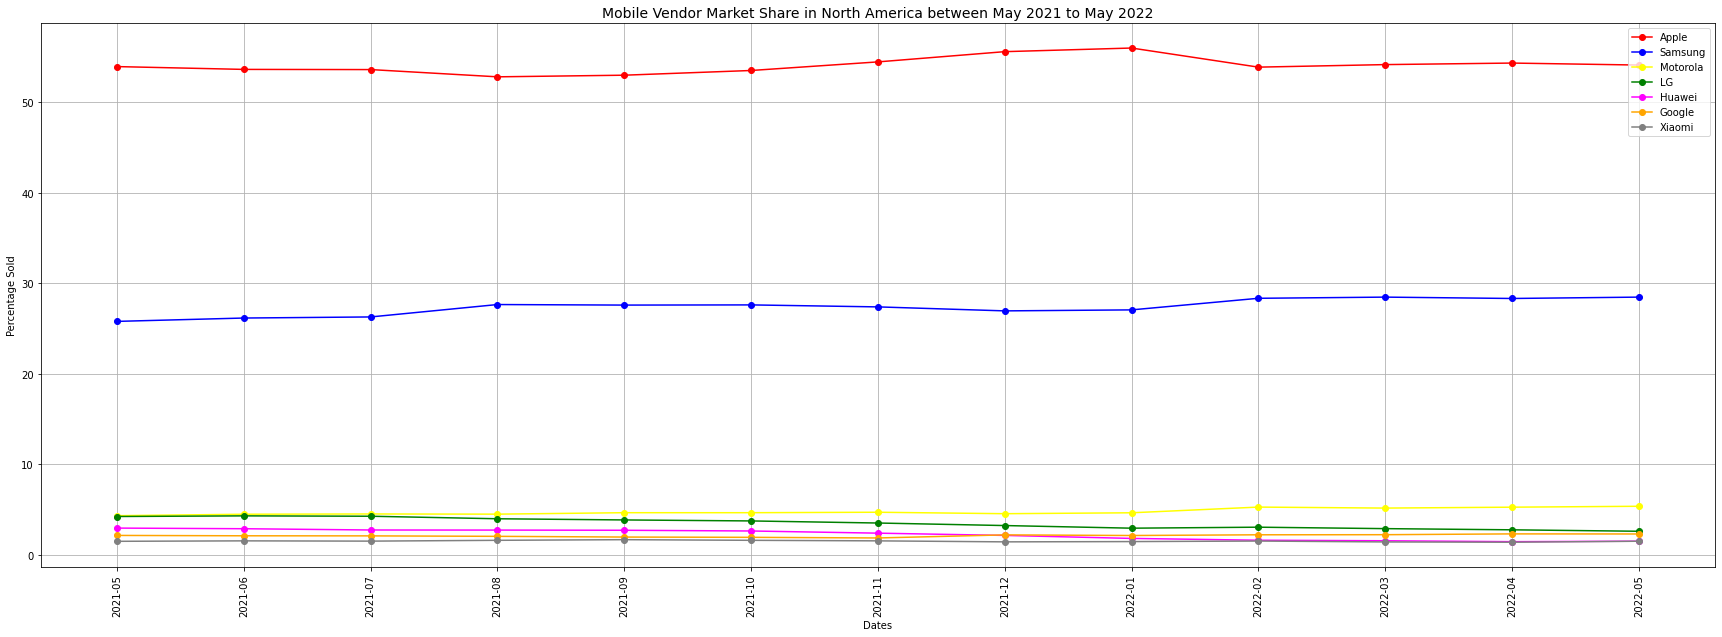

In [22]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(northamerica_df['Date'], northamerica_df['Apple'], color='red', marker='o', label="Apple")
plt.plot(northamerica_df['Date'], northamerica_df['Samsung'], color='blue', marker='o', label="Samsung")
plt.plot(northamerica_df['Date'], northamerica_df['Motorola'], color='yellow', marker='o', label="Motorola")
plt.plot(northamerica_df['Date'], northamerica_df['LG'], color='green', marker='o', label="LG")
plt.plot(northamerica_df['Date'], northamerica_df['Huawei'], color='magenta', marker='o', label="Huawei")
plt.plot(northamerica_df['Date'], northamerica_df['Google'], color='orange', marker='o', label="Google")
plt.plot(northamerica_df['Date'], northamerica_df['Xiaomi'], color='grey', marker='o', label="Xiaomi")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share in North America between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share in North America between May 2021 to May 2022.png")
plt.show()

# Oceania 

In [23]:
# read csv file Oceania 
oceania_csv = "static/Data/oceania.csv"

In [24]:
# Create dataframe
oceania_df = pd.read_csv(oceania_csv)
oceania_df.head()

,Date,Apple,Samsung,Huawei,Oppo,Google,Xiaomi,Unknown,Nokia,Motorola,OnePlus,Lenovo,Vivo,Realme,LG,Sony,Alcatel,HTC,Asus,Vodafone,ZTE,Honor,BBK,Tecno,Infinix,Other
0,2021-05,52.73,25.01,9.55,4.27,1.56,1.73,1.22,0.64,0.54,0.55,0.39,0.38,0.26,0.32,0.24,0.08,0.12,0.09,0.06,0.07,0.05,0.03,0.01,0.01,0.11
1,2021-06,53.22,24.79,9.31,4.25,1.55,1.72,1.32,0.63,0.55,0.54,0.35,0.38,0.25,0.32,0.23,0.07,0.11,0.09,0.06,0.06,0.04,0.03,0.01,0.01,0.11
2,2021-07,53.67,24.67,9.29,4.15,1.48,1.66,1.33,0.59,0.55,0.51,0.40,0.37,0.27,0.31,0.21,0.06,0.10,0.08,0.05,0.05,0.04,0.03,0.01,0.01,0.10
3,2021-08,52.27,26.80,8.90,4.17,1.42,1.67,1.02,0.59,0.55,0.51,0.40,0.34,0.30,0.34,0.20,0.06,0.10,0.08,0.05,0.05,0.04,0.02,0.02,0.01,0.10
4,2021-09,52.78,27.02,8.15,4.13,1.45,1.69,1.04,0.61,0.56,0.48,0.40,0.35,0.31,0.33,0.21,0.06,0.10,0.07,0.05,0.06,0.03,0.02,0.01,0.01,0.09


In [25]:
# Performing a .count to make sure that the data is complete
print(oceania_df.count())

Date        13
Apple       13
Samsung     13
Huawei      13
Oppo        13
Google      13
Xiaomi      13
Unknown     13
Nokia       13
Motorola    13
OnePlus     13
Lenovo      13
Vivo        13
Realme      13
LG          13
Sony        13
Alcatel     13
HTC         13
Asus        13
Vodafone    13
ZTE         13
Honor       13
BBK         13
Tecno       13
Infinix     13
Other       13
dtype: int64


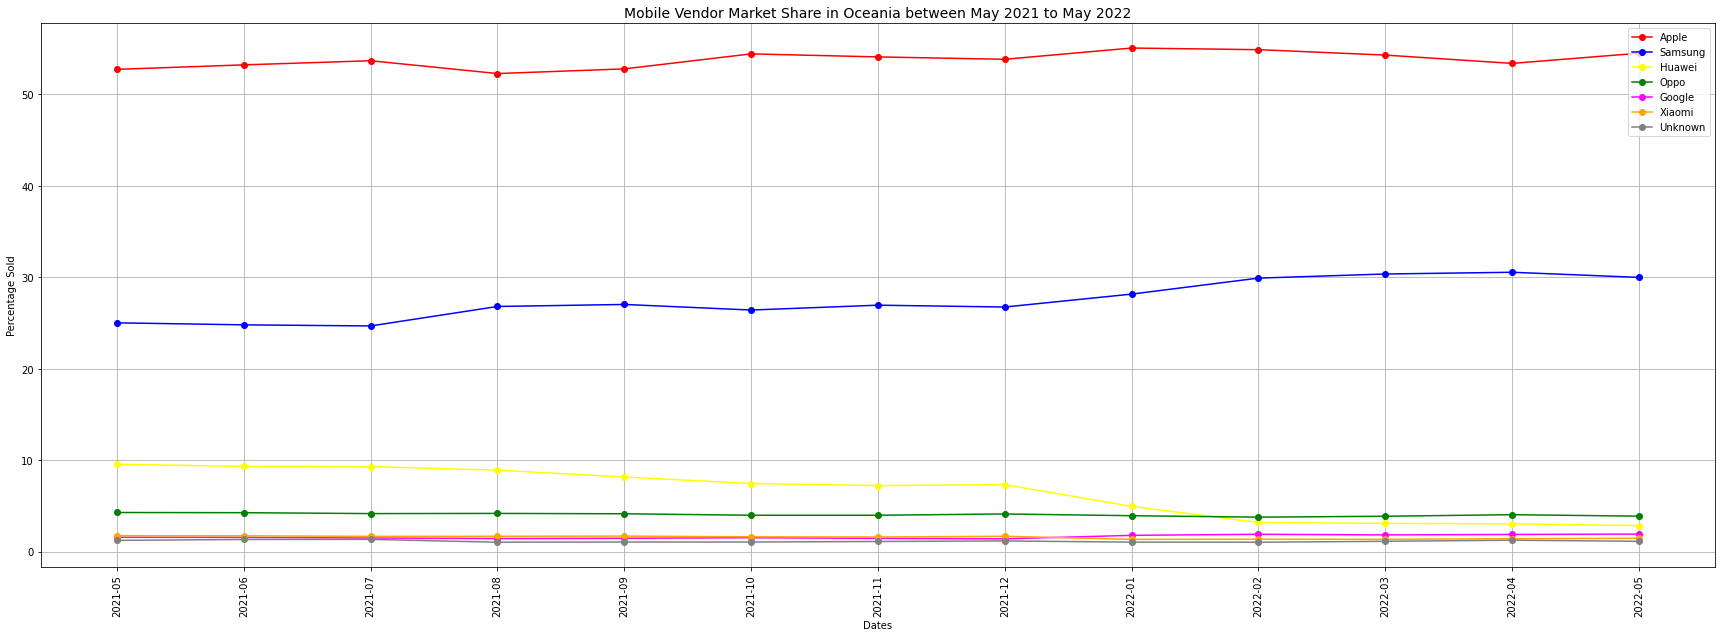

In [26]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(oceania_df['Date'], oceania_df['Apple'], color='red', marker='o', label="Apple")
plt.plot(oceania_df['Date'], oceania_df['Samsung'], color='blue', marker='o', label="Samsung")
plt.plot(oceania_df['Date'], oceania_df['Huawei'], color='yellow', marker='o', label="Huawei")
plt.plot(oceania_df['Date'], oceania_df['Oppo'], color='green', marker='o', label="Oppo")
plt.plot(oceania_df['Date'], oceania_df['Google'], color='magenta', marker='o', label="Google")
plt.plot(oceania_df['Date'], oceania_df['Xiaomi'], color='orange', marker='o', label="Xiaomi")
plt.plot(oceania_df['Date'], oceania_df['Unknown'], color='grey', marker='o', label="Unknown")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share in Oceania between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share in Oceania between May 2021 to May 2022.png")
plt.show()

# South America

In [27]:
# read csv file South America
southamerica_csv = "static/Data/south america.csv"

In [28]:
# Create dataframe
southamerica_df = pd.read_csv(southamerica_csv)
southamerica_df.head()

,Date,Samsung,Motorola,Xiaomi,Apple,Huawei,LG,Unknown,Asus,Nokia,ZTE,Alcatel,Lenovo,Realme,Tecno,Sony,Vivo,Oppo,Mixc,OnePlus,Google,Infinix,Blu,Honor,HTC,Meizu,Other
0,2021-05,45.41,16.98,9.51,10.70,8.37,4.59,0.98,0.74,0.50,0.44,0.43,0.34,0.13,0.07,0.28,0.06,0.03,0.0,0.09,0.05,0.02,0.06,0.04,0.03,0.01,0.16
1,2021-06,44.91,17.08,9.77,10.90,8.46,4.41,1.09,0.73,0.49,0.44,0.41,0.32,0.14,0.07,0.27,0.07,0.03,0.0,0.08,0.05,0.02,0.05,0.04,0.03,0.01,0.15
2,2021-07,44.86,17.40,9.99,11.28,7.58,4.44,1.10,0.77,0.48,0.40,0.37,0.34,0.15,0.09,0.25,0.08,0.03,0.0,0.08,0.05,0.02,0.05,0.03,0.02,0.01,0.14
3,2021-08,45.33,17.18,10.65,10.66,7.26,4.78,0.70,0.71,0.48,0.41,0.36,0.33,0.18,0.18,0.23,0.09,0.05,0.0,0.08,0.05,0.04,0.05,0.03,0.02,0.01,0.13
4,2021-09,45.04,17.13,11.09,10.72,7.23,4.55,0.75,0.66,0.49,0.42,0.35,0.33,0.21,0.20,0.22,0.11,0.07,0.0,0.08,0.05,0.05,0.04,0.03,0.02,0.01,0.13


In [29]:
# Performing a .count to make sure that the data is complete
print(southamerica_df.count())

Date        13
Samsung     13
Motorola    13
Xiaomi      13
Apple       13
Huawei      13
LG          13
Unknown     13
Asus        13
Nokia       13
ZTE         13
Alcatel     13
Lenovo      13
Realme      13
Tecno       13
Sony        13
Vivo        13
Oppo        13
Mixc        13
OnePlus     13
Google      13
Infinix     13
Blu         13
Honor       13
HTC         13
Meizu       13
Other       13
dtype: int64


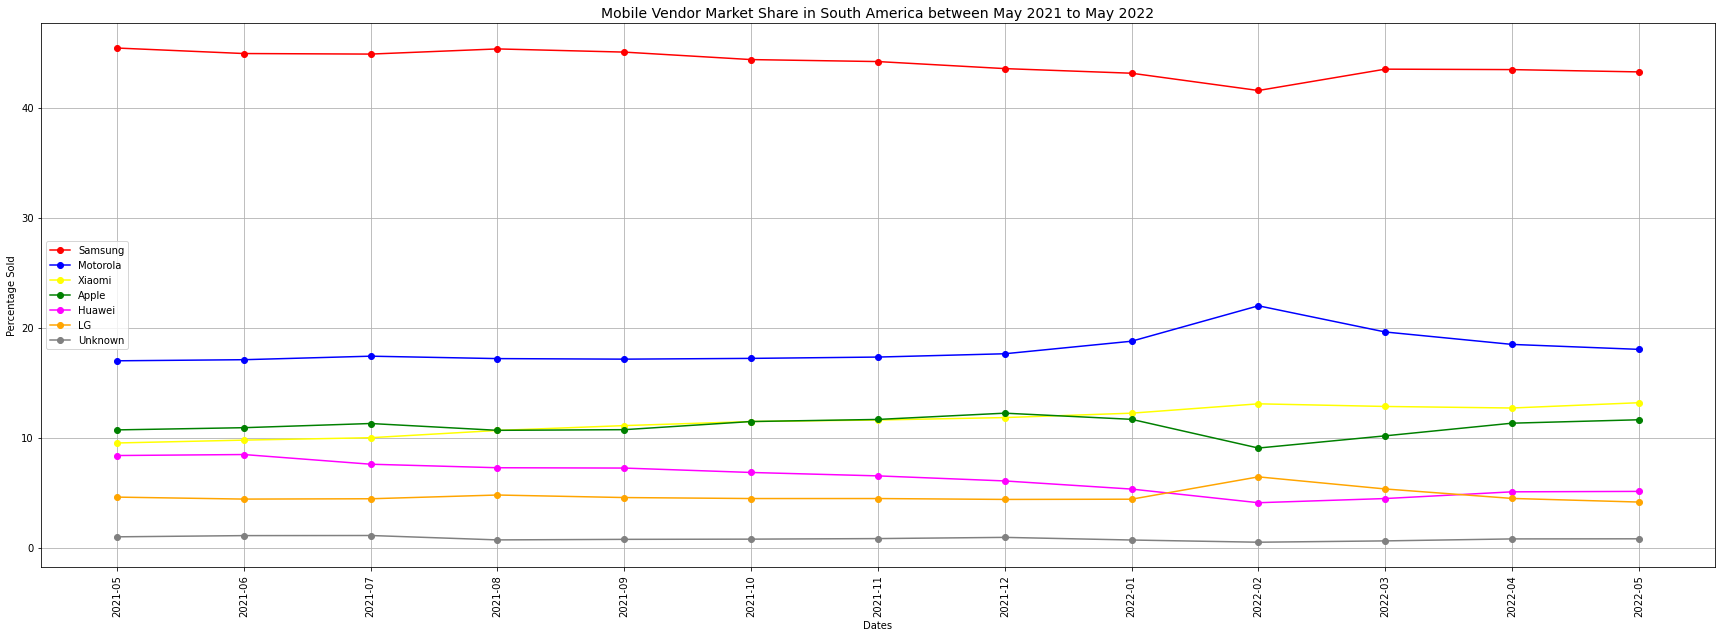

In [30]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(southamerica_df['Date'], southamerica_df['Samsung'], color='red', marker='o', label="Samsung")
plt.plot(southamerica_df['Date'], southamerica_df['Motorola'], color='blue', marker='o', label="Motorola")
plt.plot(southamerica_df['Date'], southamerica_df['Xiaomi'], color='yellow', marker='o', label="Xiaomi")
plt.plot(southamerica_df['Date'], southamerica_df['Apple'], color='green', marker='o', label="Apple")
plt.plot(southamerica_df['Date'], southamerica_df['Huawei'], color='magenta', marker='o', label="Huawei")
plt.plot(southamerica_df['Date'], southamerica_df['LG'], color='orange', marker='o', label="LG")
plt.plot(southamerica_df['Date'], southamerica_df['Unknown'], color='grey', marker='o', label="Unknown")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share in South America between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share in South America between May 2021 to May 2022.png")
plt.show()

# Worldwide

In [31]:
# read csv file Worldwide
worldwide_csv = "static/Data/worldwide.csv"

In [32]:
# Create dataframe
worldwide_df = pd.read_csv(worldwide_csv)
worldwide_df.head()

,Date,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,LG,OnePlus,Tecno,Infinix,Google,Nokia,Lenovo,Sony,Asus,Itel,HTC,BBK,ZTE,General Mobile,Alcatel,Infinex,Lava,Vestel,Casper,Micromax,Honor,Gionee,T-Mobile,Meizu,Wiko,LeEco,Vodafone,Coolpad,Sharp,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
0,2021-05,26.46,27.84,10.63,8.84,5.39,4.12,2.41,3.20,2.18,1.58,0.87,0.77,0.62,0.67,0.64,0.60,0.53,0.53,0.21,0.20,0.19,0.14,0.14,0.13,0.10,0.11,0.06,0.06,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.03,0.03,0.02,0.02,0.01,0.01,0.02,0.0,0.01,0.26
1,2021-06,26.35,27.48,10.80,8.66,5.67,4.32,2.62,3.12,2.23,1.55,0.89,0.74,0.63,0.66,0.64,0.57,0.50,0.52,0.20,0.20,0.19,0.14,0.13,0.13,0.11,0.11,0.06,0.05,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.01,0.01,0.01,0.0,0.02,0.25
2,2021-07,26.92,27.33,10.94,8.19,5.54,4.34,2.66,3.21,2.27,1.55,0.88,0.74,0.60,0.67,0.63,0.56,0.48,0.50,0.20,0.19,0.18,0.13,0.12,0.12,0.11,0.10,0.05,0.05,0.07,0.04,0.05,0.04,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.0,0.02,0.23
3,2021-08,26.42,27.92,11.38,7.91,5.61,4.58,2.83,2.27,2.25,1.52,0.96,0.86,0.82,0.68,0.60,0.54,0.46,0.47,0.26,0.17,0.16,0.13,0.11,0.11,0.11,0.09,0.05,0.05,0.05,0.04,0.05,0.04,0.03,0.03,0.01,0.03,0.02,0.02,0.02,0.03,0.02,0.01,0.04,0.01,0.01,0.0,0.01,0.21
4,2021-09,26.75,27.55,11.51,7.88,5.65,4.57,2.85,2.26,2.26,1.45,0.96,0.90,0.88,0.67,0.58,0.53,0.44,0.44,0.27,0.16,0.15,0.13,0.10,0.11,0.11,0.08,0.05,0.04,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0,0.01,0.20


In [33]:
#Code to view all columns in dataset
pd.set_option('max_columns', None)
worldwide_df.head()

,Date,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,LG,OnePlus,Tecno,Infinix,Google,Nokia,Lenovo,Sony,Asus,Itel,HTC,BBK,ZTE,General Mobile,Alcatel,Infinex,Lava,Vestel,Casper,Micromax,Honor,Gionee,T-Mobile,Meizu,Wiko,LeEco,Vodafone,Coolpad,Sharp,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
0,2021-05,26.46,27.84,10.63,8.84,5.39,4.12,2.41,3.20,2.18,1.58,0.87,0.77,0.62,0.67,0.64,0.60,0.53,0.53,0.21,0.20,0.19,0.14,0.14,0.13,0.10,0.11,0.06,0.06,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.03,0.03,0.02,0.02,0.01,0.01,0.02,0.0,0.01,0.26
1,2021-06,26.35,27.48,10.80,8.66,5.67,4.32,2.62,3.12,2.23,1.55,0.89,0.74,0.63,0.66,0.64,0.57,0.50,0.52,0.20,0.20,0.19,0.14,0.13,0.13,0.11,0.11,0.06,0.05,0.07,0.04,0.05,0.03,0.04,0.04,0.02,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.01,0.01,0.01,0.0,0.02,0.25
2,2021-07,26.92,27.33,10.94,8.19,5.54,4.34,2.66,3.21,2.27,1.55,0.88,0.74,0.60,0.67,0.63,0.56,0.48,0.50,0.20,0.19,0.18,0.13,0.12,0.12,0.11,0.10,0.05,0.05,0.07,0.04,0.05,0.04,0.03,0.03,0.02,0.02,0.03,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.0,0.02,0.23
3,2021-08,26.42,27.92,11.38,7.91,5.61,4.58,2.83,2.27,2.25,1.52,0.96,0.86,0.82,0.68,0.60,0.54,0.46,0.47,0.26,0.17,0.16,0.13,0.11,0.11,0.11,0.09,0.05,0.05,0.05,0.04,0.05,0.04,0.03,0.03,0.01,0.03,0.02,0.02,0.02,0.03,0.02,0.01,0.04,0.01,0.01,0.0,0.01,0.21
4,2021-09,26.75,27.55,11.51,7.88,5.65,4.57,2.85,2.26,2.26,1.45,0.96,0.90,0.88,0.67,0.58,0.53,0.44,0.44,0.27,0.16,0.15,0.13,0.10,0.11,0.11,0.08,0.05,0.04,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0,0.01,0.20


In [34]:
# Preforming a .count to make sure that the data is complete
print(worldwide_df.count())

Date              13
Apple             13
Samsung           13
Xiaomi            13
Huawei            13
Oppo              13
Vivo              13
Realme            13
Unknown           13
Motorola          13
LG                13
OnePlus           13
Tecno             13
Infinix           13
Google            13
Nokia             13
Lenovo            13
Sony              13
Asus              13
Itel              13
HTC               13
BBK               13
ZTE               13
General Mobile    13
Alcatel           13
Infinex           13
Lava              13
Vestel            13
Casper            13
Micromax          13
Honor             13
Gionee            13
T-Mobile          13
Meizu             13
Wiko              13
LeEco             13
Vodafone          13
Coolpad           13
Sharp             13
Hisense           13
QMobile           13
Kyocera           13
Reeder            13
Unimax            13
Condor            13
bq                13
TCL               13
Sumsung      

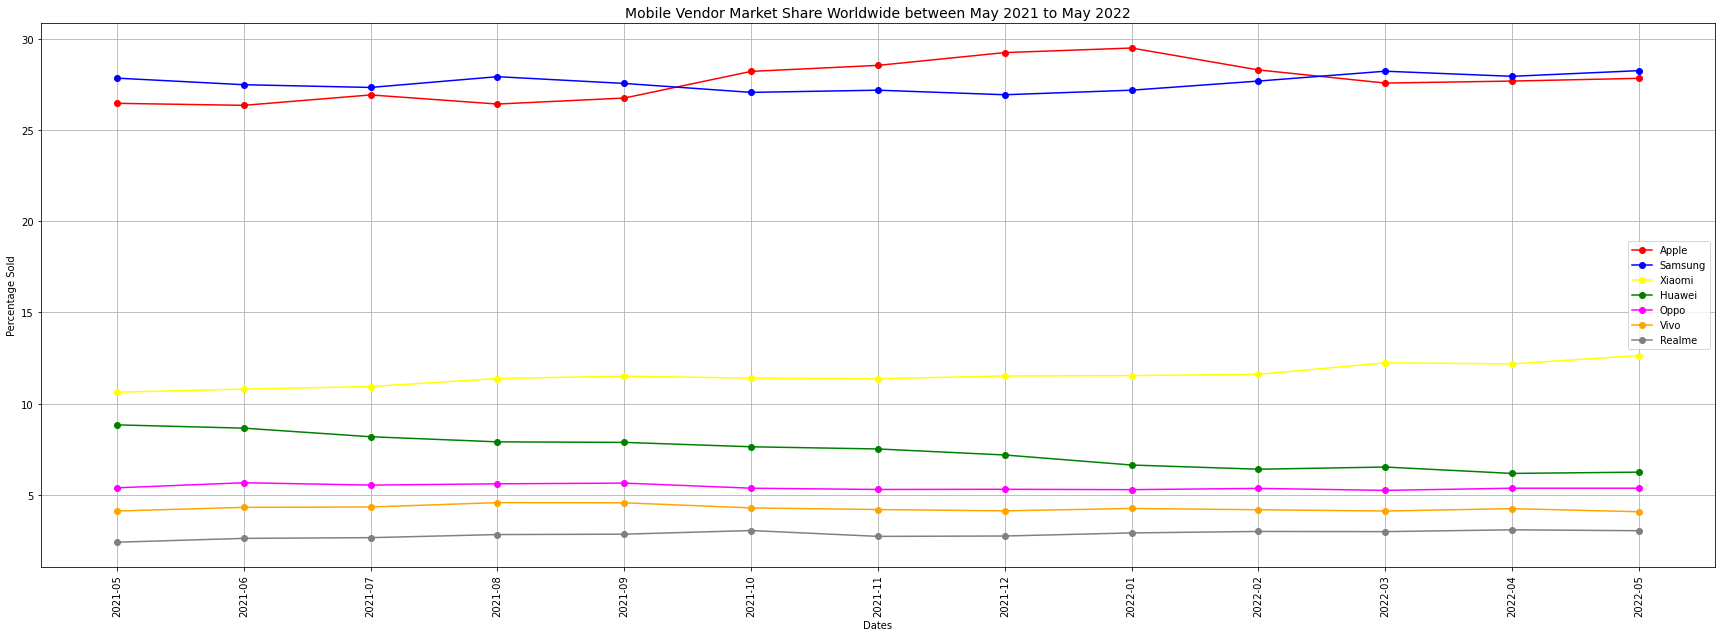

In [35]:
#Create a line plot to see the top 7 mobile device vendor between May 2021 and May 2022
plt.figure(figsize = (30, 10))
plt.plot(worldwide_df['Date'], worldwide_df['Apple'], color='red', marker='o', label="Apple")
plt.plot(worldwide_df['Date'], worldwide_df['Samsung'], color='blue', marker='o', label="Samsung")
plt.plot(worldwide_df['Date'], worldwide_df['Xiaomi'], color='yellow', marker='o', label="Xiaomi")
plt.plot(worldwide_df['Date'], worldwide_df['Huawei'], color='green', marker='o', label="Huawei")
plt.plot(worldwide_df['Date'], worldwide_df['Oppo'], color='magenta', marker='o', label="Oppo")
plt.plot(worldwide_df['Date'], worldwide_df['Vivo'], color='orange', marker='o', label="Vivo")
plt.plot(worldwide_df['Date'], worldwide_df['Realme'], color='grey', marker='o', label="Realme")
plt.xticks(rotation = 90)
plt.title('Mobile Vendor Market Share Worldwide between May 2021 to May 2022', fontsize=14)
plt.xlabel('Dates', fontsize=10)
plt.ylabel('Percentage Sold', fontsize=10)
plt.grid(True)
plt.legend()
plt.savefig("static/Img/Mobile Vendor Market Share Worldwide between May 2021 to May 2022.png")
plt.show()

In [36]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=worldwide_df.corr()
corr_data

,Apple,Samsung,Xiaomi,Huawei,Oppo,Vivo,Realme,Unknown,Motorola,LG,OnePlus,Tecno,Infinix,Google,Nokia,Lenovo,Sony,Asus,Itel,HTC,BBK,ZTE,General Mobile,Alcatel,Infinex,Lava,Vestel,Casper,Micromax,Honor,Gionee,T-Mobile,Meizu,Wiko,LeEco,Vodafone,Coolpad,Sharp,Hisense,QMobile,Kyocera,Reeder,Unimax,Condor,bq,TCL,Sumsung,Other
Apple,1.000000e+00,-4.823240e-01,3.662885e-01,-0.627935,-7.652024e-01,-4.704240e-01,4.260953e-01,-4.238173e-01,3.211013e-01,-6.678194e-01,5.765548e-01,3.085376e-01,5.587205e-01,5.019542e-01,-7.976384e-01,-6.694162e-01,-7.475176e-01,-7.139835e-01,2.416570e-01,-6.992140e-01,-6.701218e-01,-4.996267e-01,-2.797216e-01,-7.373858e-01,-5.389517e-01,-6.373307e-01,-6.236675e-01,-5.023847e-01,-6.444751e-01,-2.378665e-01,-7.542986e-01,6.000763e-02,-5.467180e-01,-6.921284e-01,1.789841e-01,-6.808107e-01,-3.732789e-01,-2.689384e-16,-4.866693e-01,-6.429686e-01,-4.141311e-01,-2.949133e-01,-3.621730e-01,6.294407e-01,-1.418633e-01,0.388159,-4.355962e-01,-7.927864e-01
Samsung,-4.823240e-01,1.000000e+00,5.066118e-01,-0.291235,3.461234e-02,-1.091120e-01,2.366881e-01,-2.041985e-01,3.886687e-01,-2.140172e-01,3.176980e-01,4.431995e-01,4.726982e-02,3.556714e-01,-3.857698e-02,-2.211935e-01,2.967571e-01,-1.831510e-01,1.283842e-01,-1.881988e-01,-2.610690e-01,-4.051629e-01,6.455215e-01,-1.388404e-02,-4.063049e-01,-2.657029e-01,2.280709e-01,4.004347e-01,-2.523592e-01,8.425904e-01,-9.959819e-02,5.327751e-01,-3.187206e-01,-1.413641e-01,-4.995012e-01,2.165575e-01,-4.771520e-01,1.308694e-15,-2.384942e-01,-2.486471e-01,-1.362593e-01,3.529919e-01,-4.169741e-02,-4.893112e-01,-1.342959e-01,0.515747,-1.802393e-01,5.217497e-03
Xiaomi,3.662885e-01,5.066118e-01,1.000000e+00,-0.893076,-4.515644e-01,-2.946594e-01,8.329289e-01,-6.954839e-01,5.713921e-01,-8.900780e-01,8.404992e-01,8.042287e-01,6.890193e-01,7.501990e-01,-8.291558e-01,-9.192156e-01,-5.874863e-01,-8.864955e-01,5.167403e-01,-8.707008e-01,-9.237557e-01,-9.330642e-01,3.283800e-01,-8.299046e-01,-7.608631e-01,-9.347961e-01,-3.415682e-01,-1.522129e-01,-9.011670e-01,5.489734e-01,-8.013978e-01,5.715769e-01,-8.486176e-01,-8.191767e-01,-2.035620e-01,-5.818137e-01,-9.670124e-01,7.464739e-16,-6.910840e-01,-8.352268e-01,-4.425884e-01,1.703523e-01,-2.127776e-01,-4.855961e-02,-3.921178e-01,0.751479,-5.047060e-01,-8.285292e-01
Huawei,-6.279348e-01,-2.912348e-01,-8.930756e-01,1.000000,6.293232e-01,3.935002e-01,-8.455330e-01,6.996615e-01,-7.747832e-01,9.083795e-01,-9.492286e-01,-8.063846e-01,-7.318363e-01,-8.931576e-01,9.110901e-01,9.528900e-01,6.484078e-01,9.680055e-01,-5.064971e-01,9.664207e-01,9.720755e-01,9.512785e-01,-8.218198e-02,8.817195e-01,8.606421e-01,9.627459e-01,6.330047e-01,4.382557e-01,9.610885e-01,-5.228880e-01,9.285185e-01,-6.577620e-01,9.574420e-01,9.463758e-01,2.160238e-01,6.852541e-01,8.685166e-01,0.000000e+00,7.808600e-01,9.484212e-01,4.506640e-01,1.138538e-01,3.489498e-01,-2.430010e-01,4.216914e-01,-0.874299,5.115999e-01,9.117286e-01
Oppo,-7.652024e-01,3.461234e-02,-4.515644e-01,0.629323,1.000000e+00,7.888119e-01,-3.400998e-01,2.960022e-01,-4.580722e-01,6.500473e-01,-5.397693e-01,-3.994013e-01,-4.204973e-01,-5.461783e-01,7.009548e-01,6.638615e-01,4.293262e-01,6.900835e-01,-1.707016e-01,6.902011e-01,6.795931e-01,5.885541e-01,-2.454888e-02,6.301951e-01,7.588096e-01,6.601330e-01,5.382395e-01,1.973347e-01,6.402228e-01,-3.916201e-02,7.083946e-01,-1.883859e-01,5.449974e-01,6.118013e-01,-1.376954e-01,5.335331e-01,4.978944e-01,-4.925061e-16,3.704993e-01,6.636442e-01,2.813695e-01,1.576708e-01,4.864566e-01,-4.399133e-01,-1.276803e-01,-0.533071,5.639212e-01,6.597431e-01
Vivo,-4.704240e-01,-1.091120e-01,-2.946594e-01,0.393500,7.888119e-01,1.000000e+00,-3.549575e-02,-1.243419e-01,-3.359932e-01,4.927487e-01,-2.339456e-01,-6.759582e-02,2.427394e-03,-4.188575e-01,3.895330e-01,4.856474e-01,8.358048e-02,4.272141e-01,2.839861e-01,3.834715e-01,4.457804e-01,4.063023e-01,-4.123313e-01,3.121074e-01,6.318514e-01,3.989493e-01,1.154311e-01,-1.468612e-01,3.478824e-01,-1.685581e-01,4.997181e-01,-4.257527e-02,2.419105e

# Create graphs to show correlation between different variables in the Data Set


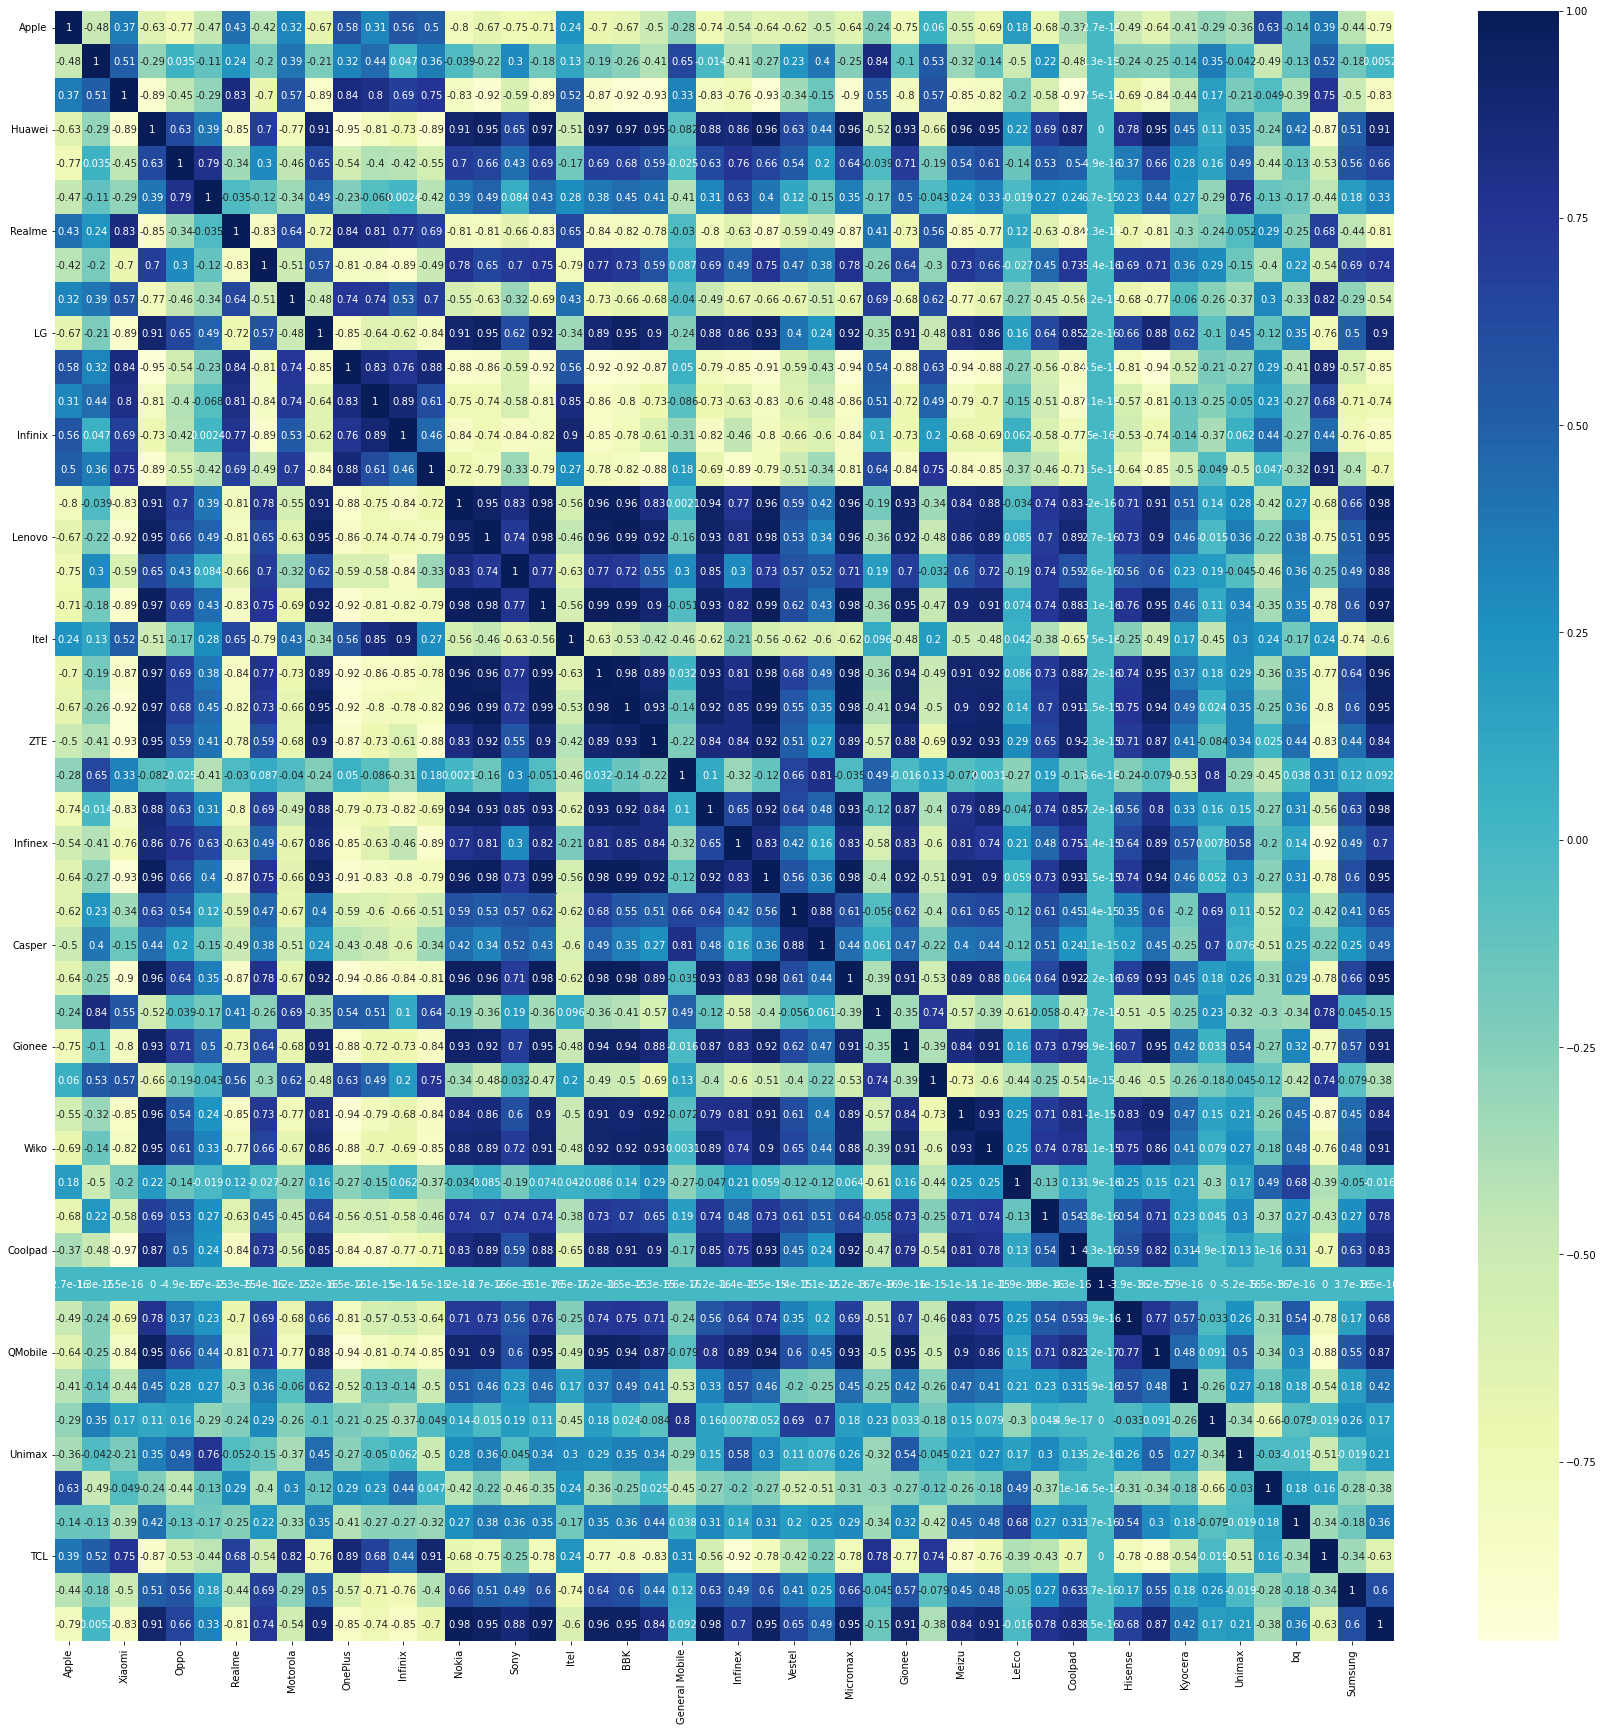

In [37]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(30, 30)
plt.savefig("static/Img/worldwideheatmap.png")
plt.show()

# Part 2: MongoDB


In [38]:
import pymongo

In [39]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [40]:
# Declare the database for all continents
db = client.phonebrand

In [41]:
#Create a dictionary to hold Africa's data
africa_dict = africa_df.to_dict("records")

In [42]:
#Insert Africa's data in the database
db.africa.insert_many(africa_dict)

In [43]:
#Create a dictionary to hold Asia's data
asia_dict = asia_df.to_dict("records")

In [44]:
#Insert Asia's data in the database
db.asia.insert_many(asia_dict)

In [45]:
#Create a dictionary to hold Worldwide's data
worldwide_dict = worldwide_df.to_dict("records")

In [46]:
#Insert data worldwide's data in the database
db.worldwide.insert_many(worldwide_dict)

In [47]:
#Create a dictionary to hold Europe's data
europe_dict = europe_df.to_dict("records")

In [48]:
#Insert Europe's data in the database
db.europe.insert_many(europe_dict)

In [49]:
#Create a dictionary to hold NorthAmerica's data
northamerica_dict = northamerica_df.to_dict("records")

In [50]:
#Insert NorthAmerica's data in the database
db.northamerica.insert_many(northamerica_dict)

In [51]:
#Create a dictionary to hold Oceania's data
oceania_dict = oceania_df.to_dict("records")

In [52]:
#Insert Oceania's data in the database
db.oceania.insert_many(oceania_dict)

In [53]:
#Create a dictionary to hold South America's data
southamerica_dict = southamerica_df.to_dict("records")

In [54]:
#Insert South America's data in the database
db.southamerica.insert_many(southamerica_dict)

# Section II: In this case, we looked at data of the latest phones released and compared their SOCs (system-on-a-chip) to see which brands created the most efficient ones.

In [55]:
# read csv file Android VS IOS
android_vs_ios_csv = "static/Data/antutu_android_vs_ios_v4.csv"

In [56]:
# Create dataframe
android_vs_ios_df = pd.read_csv(android_vs_ios_csv, encoding='iso-8859-1')
android_vs_ios_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


In [57]:
# Preforming a .count to make sure that the data is complete
print(android_vs_ios_df.count())

ï»¿Device      179
CPU            179
GPU            179
MEM            179
UX             179
Total Score    179
dtype: int64


In [58]:
# read csv file Benchmark
benchmark_csv = "static/Data/ML_ALL_benchmarks.csv"

In [59]:
# Create dataframe
benchmark_df = pd.read_csv(benchmark_csv, encoding='iso-8859-1')
benchmark_df.head()

,ï»¿device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656


In [60]:
# Preforming a .count to make sure that the data is complete
print(benchmark_df.count())

ï»¿device    188
company      188
cpuName      188
cores        188
clock        188
cpuScore     188
gpuScore     188
npuScore     188
dtype: int64


In [61]:
# read csv file Smartphone CPU
smartphone_cpu_csv = "static/Data/smartphone_cpu_stats.csv"

In [62]:
# Create dataframe
smartphone_cpu_df = pd.read_csv(smartphone_cpu_csv, encoding='iso-8859-1')
smartphone_cpu_df.head()

,ï»¿rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,Â (2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,Â (1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,Â (1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,Â (2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,Â (1+3+4),2995,Adreno 660


In [63]:
# Preforming a .count to make sure that the data is complete
print(smartphone_cpu_df.count())

ï»¿rank            125
company            125
cpuName            125
geekbenchSingle    125
geekbenchMulti     125
antutu9            125
coreCount          125
coreConfig         125
clockSpeed         125
gpu                125
dtype: int64


In [64]:
smartphone_cpu_df = pd.read_csv(smartphone_cpu_csv, encoding='iso-8859-1')
smartphone_cpu_df.head()

,ï»¿rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,Â (2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,Â (1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,Â (1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,Â (2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,Â (1+3+4),2995,Adreno 660


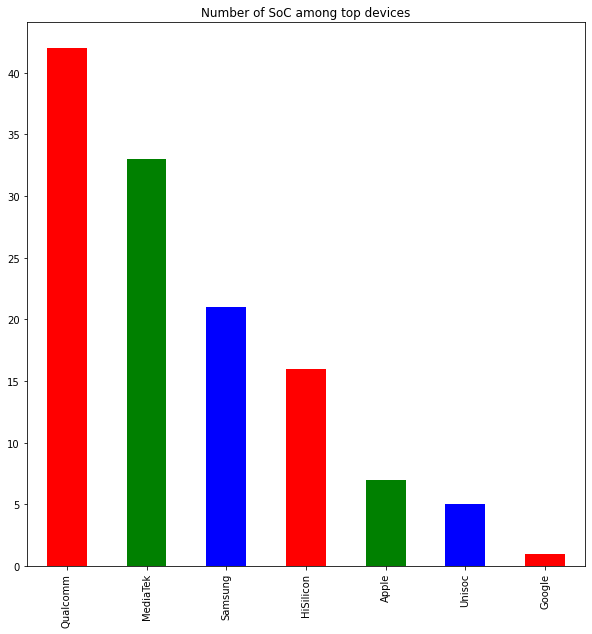

In [65]:
#Number of SoCs made by companies, among top performing devices
fig = plt.figure(figsize =(10, 10))
smartphone_cpu_df['company'].value_counts().plot.bar(color=['red','green','blue'])
plt.title('Number of SoC among top devices')
plt.savefig("static/Img/Number of SoC among top devices.png")
plt.show()

# Clean the data

In [66]:
# Fix column names(need to figure why it wont drop the weird characters on device)
android_vs_ios_df=android_vs_ios_df.rename(columns={'ï»¿device':'Device','ï»¿': '' })
android_vs_ios_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


In [67]:
benchmark_df=android_vs_ios_df.rename(columns={'ï»¿device':'Device','ï»¿': '' })
benchmark_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


# Manipulate the data

In [68]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=android_vs_ios_df.corr()
corr_data

,CPU,GPU,MEM,UX,Total Score
CPU,1.000000,0.916648,0.788749,0.761240,0.953742
GPU,0.916648,1.000000,0.807061,0.732169,0.977957
MEM,0.788749,0.807061,1.000000,0.879410,0.888577
UX,0.761240,0.732169,0.879410,1.000000,0.837396
Total Score,0.953742,0.977957,0.888577,0.837396,1.000000


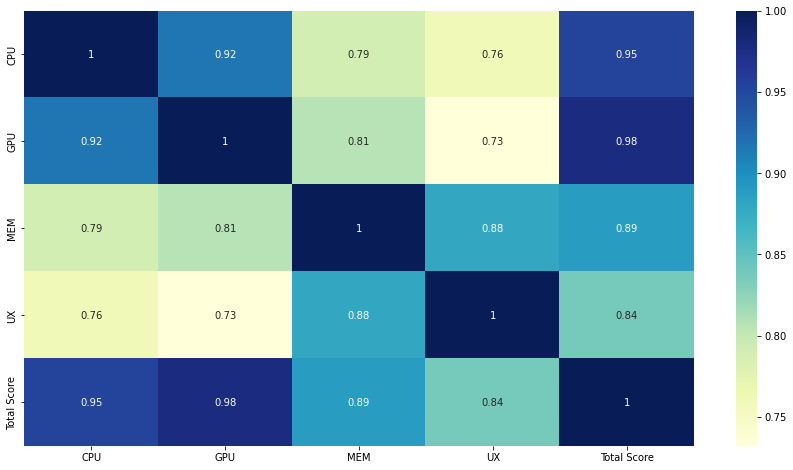

In [69]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap

# just testing it out, need to add the real merged table
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(15, 8)
plt.savefig("static/Img/heatmapp.png")
plt.show()

# Section III: In this case, we scraped data from a website using beautiful soup, then we created a carousel which shows news related to phones everytime you scroll through

# Scrape Phone Home pages

In [70]:
# Set Executable Path & Initialize Chrome Browser
# scrape the news site for latest phone news stories
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/103.0.5060.53/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\Matt\.wdm\drivers\chromedriver\win32\103.0.5060.53]


In [71]:
# Visit the Pocket-Lint News Site
# proof of concept to later build a for loop for the whole page
url = "https://www.pocket-lint.com/phones/news"
browser.visit(url)

In [72]:
# Parse Results HTML with BeautifulSoup
# Find Everything Inside:
#   <div class="article">
#     

html = browser.html
news_soup = BeautifulSoup(html, "html.parser")
slide_element = news_soup.select_one("div.articles")
slide_element

<div class="articles">
<div class="article" data-type="News">
<a href="https://www.pocket-lint.com/phones/news/qualcomm/161403-qualcomm-smartphone-roadmap" title="Qualcomm has huge plans in the smartphone market"></a>
<span class="article-thumbnail">
<img alt="Qualcomm has huge plans in the smartphone market" src="//cdn.pocket-lint.com/r/c/120x120/assets/images/161403-phones-news-qualcomm-has-huge-plans-in-the-smartphone-market-image1-s0ptrz23iv.jpg"/>
</span>
<div class="article-info">
<span class="article-info-title">
<span>Qualcomm has huge plans in the smartphone market</span>
</span>
<span class="article-info-publish">
<!--· <span class="best-offer"></span>-->
<span style="display: block; margin-top:2px;"></span>
                By                <span class="author">Pocket-lint Promotion</span>
                ·
                <time datetime="2022-07-13T14:05:00+01:00" pubdate="pubdate">13 July 2022</time>
</span>
<p class="article-info-description">The chipmaker is going from s

In [73]:
# slide_element.find("div", class_="article")
# Title, Paragraph, thumbnail img, link to article
article_list = slide_element.find_all("div", class_="article")
phone_title_url_img_pars = []
for i in range(20):
    phone = {}
#     print(article_list[i])
    news_title = article_list[i].find("span", class_="article-info-title").get_text()
    phone["news_title"] =news_title
    news_p = article_list[i].find("p", class_="article-info-description").get_text()
#     print(news_p)
    phone["news_p"] =news_p
#     print(phone)
    url_lin = article_list[i].find("a")["href"]
    phone["url_lin"] =url_lin
    news_pic = article_list[i].find("img")["src"]
    phone["news_pic"] =news_pic
    phone_title_url_img_pars.append(phone)
print(phone_title_url_img_pars)

[{'news_title': '\nQualcomm has huge plans in the smartphone market\n', 'news_p': 'The chipmaker is going from strength to strength when it comes to smartphones. ', 'url_lin': 'https://www.pocket-lint.com/phones/news/qualcomm/161403-qualcomm-smartphone-roadmap', 'news_pic': '//cdn.pocket-lint.com/r/c/120x120/assets/images/161403-phones-news-qualcomm-has-huge-plans-in-the-smartphone-market-image1-s0ptrz23iv.jpg'}, {'news_title': '\nAsus confirms Zenfone 9 launch date and core specs\n', 'news_p': "It's going to be a compact powerhouse - while introducing tweaks over the Zenfone 8. ", 'url_lin': 'https://www.pocket-lint.com/phones/news/asus/161866-asus-confirms-zenfone-9-launch-date-and-core-specs', 'news_pic': '//cdn.pocket-lint.com/r/c/120x120/assets/images/161866-phones-news-asus-confirms-zenfone-9-launch-date-and-core-specs-image1-vya4onkjrf.jpg'}, {'news_title': '\nKovol offers up to 42% off on desktop and wall chargers for Prime Day\n', 'news_p': "These are some deals you can't affo

In [74]:
# Scrape the Latest News Title
# <span class="artifcle-info-title">
news_title = slide_element.find("span", class_="article-info-title").get_text()
print(news_title)


Qualcomm has huge plans in the smartphone market



In [75]:
# Scrape for the paragraph
# <p class="article-info-description">
news_p = slide_element.find("p", class_="article-info-description").get_text()
print(news_p)

The chipmaker is going from strength to strength when it comes to smartphones. 


In [76]:
# # Use Base URL to Create Final URL
# featured_img_url = f"https://www.pocket-lint.com/phones/news/{img_url}"
# print(featured_img_url)

In [77]:
df=pd.DataFrame(data=phone_title_url_img_pars)
df.head()
# phone_title_url_img_pars

,news_title,news_p,url_lin,news_pic
0,\nQualcomm has huge plans in the smartphone ma...,The chipmaker is going from strength to streng...,https://www.pocket-lint.com/phones/news/qualco...,//cdn.pocket-lint.com/r/c/120x120/assets/image...
1,\nAsus confirms Zenfone 9 launch date and core...,It's going to be a compact powerhouse - while ...,https://www.pocket-lint.com/phones/news/asus/1...,//cdn.pocket-lint.com/r/c/120x120/assets/image...
2,\nKovol offers up to 42% off on desktop and wa...,These are some deals you can't afford to miss!,https://www.pocket-lint.com/gadgets/news/16170...,//cdn.pocket-lint.com/r/c/120x120/assets/image...
3,\nMotorola Razr 2022 rumours and everything we...,This is everything we have heard so far about ...,https://www.pocket-lint.com/phones/news/motoro...,//cdn.pocket-lint.com/r/c/120x120/assets/image...
4,\nMotorola teases the Razr 2022 ahead of launch\n,"We get our first official look at the device, ...",https://www.pocket-lint.com/phones/news/motoro...,//cdn.pocket-lint.com/r/c/120x120/assets/image...


In [78]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [79]:
# Declare the database for all continents
db = client.phonebrand

In [80]:
#Insert the scraped_data in the database
db.phone.insert_many(phone_title_url_img_pars)